# MNIST

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## CNN
### EDA

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

unique, counts = np.unique(y_train, return_counts=True)
print(f"Train labels: {dict(zip(unique, counts))}")

unique, counts = np.unique(y_test, return_counts=True)
print(f"Test labels: {dict(zip(unique, counts))}")

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [7]:
indexes = np.random.randint(0, x_train.shape[0], size=9)
images = x_train[indexes]
labels = y_train[indexes]

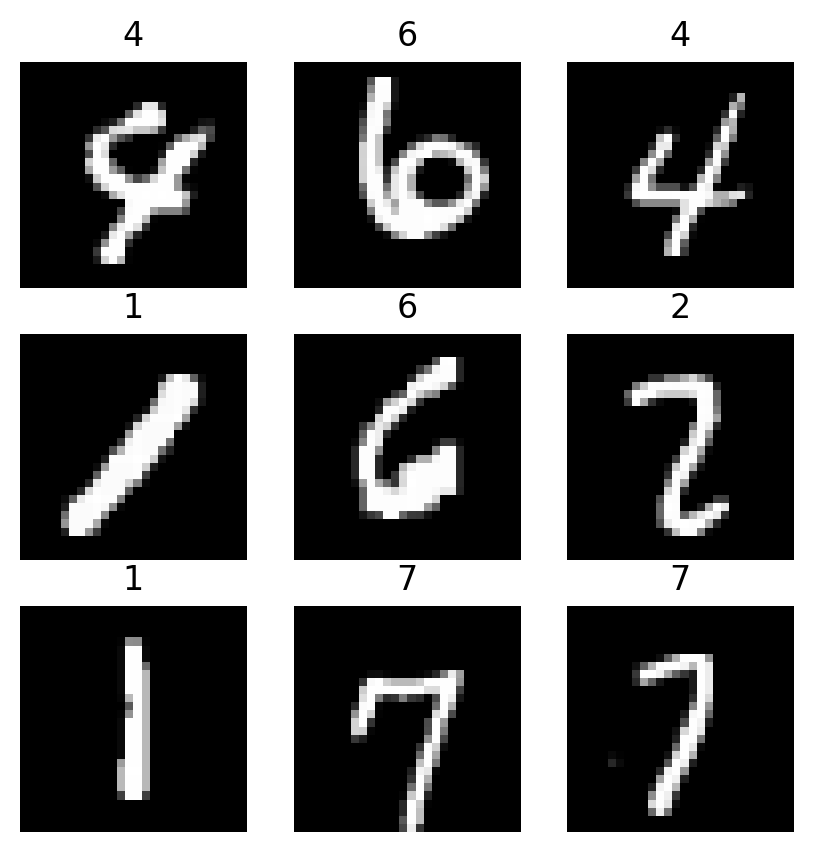

In [14]:
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(labels[i])
plt.show()

### Preprecessing

In [16]:
from keras.layers import Activation, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [23]:
num_labels = len(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

input_size = (x_train.shape[1], x_train.shape[2])

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

batch_size = 128
hidden_units = 256
dropout = 0.45

In [22]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(100000).batch(batch_size)


(28, 28)